In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [82]:
rate = 0.01
steps = 5000
batch_size = 256

architecture = (28*28, 50, 50, 2, 50, 50, 28*28)
number_layers = len(architecture)
middle_layer = number_layers//2
input_size = architecture[0]

In [83]:
X = tf.placeholder(tf.float32, shape=[None, input_size])

weights = []
biases = []

for input_size, output_size in zip(architecture, architecture[1:]):
    weights.append(tf.Variable(tf.random_normal([input_size, output_size])))
    biases.append(tf.Variable(tf.random_normal([output_size])))

def autoencode(x):
    encoding = x
    for W, b in zip(weights, biases):
        encoding = tf.nn.sigmoid(tf.add(tf.matmul(encoding, W), b))
    
    return encoding

def embed(x):
    embedding = x
    for W, b in zip(weights[:middle_layer], biases[:middle_layer]):
        embedding = tf.nn.sigmoid(tf.add(tf.matmul(embedding, W), b))
    
    return embedding
    

In [84]:
loss = tf.reduce_mean(tf.pow(X - autoencode(X), 2))
optimizer = tf.train.RMSPropOptimizer(rate).minimize(loss)

In [90]:
with tf.Session() as sess:

    sess.run(tf.global_variables_initializer())
    
    # TRAIN
    for i in range(steps):
        batch_x, _ = mnist.train.next_batch(batch_size)
        _, l = sess.run([optimizer, loss], feed_dict={X: batch_x})
        if i % 500 == 0:
            print(f'Loss: {l}')
    
    # VISUALIZE
    originals = []
    finals = []
    for _ in range(5):
        batch_x, batch_y = mnist.test.next_batch(1)
        final = sess.run(autoencode(X), feed_dict={X: batch_x})
        originals.append(batch_x[0])
        finals.append(final[0])

Loss: 0.3927508294582367
Loss: 0.07652202993631363
Loss: 0.06990928202867508
Loss: 0.06176745146512985
Loss: 0.0596221499145031


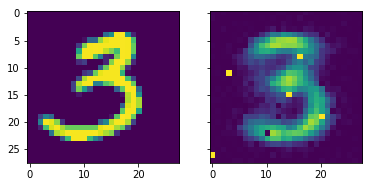

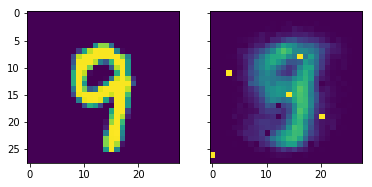

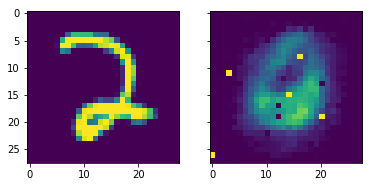

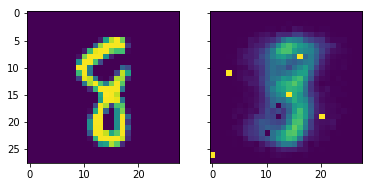

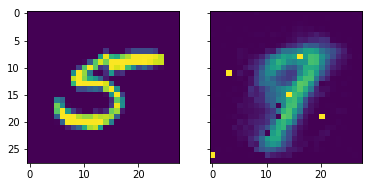

In [96]:
for original, final in zip(originals, finals):
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
    ax1.imshow(original.reshape([28, 28]))
    ax2.imshow(final.reshape([28, 28]))
    plt.show()